In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
data = np.loadtxt('data.txt', delimiter = ',', dtype=np.float64)

In [9]:
X = np.c_[np.ones(data.shape[0]),data[:, 0]]

In [10]:
X[:4, :]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032]])

In [14]:
Y = np.c_[data[:,-1]]

In [15]:
Y[:4]

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ]])

In [17]:
X.shape

(97, 2)

In [18]:
Y.shape

(97, 1)

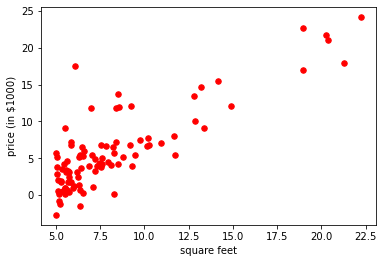

In [22]:
plt.scatter(X[:, 1], Y, s=30, c='r')
plt.xlabel('square feet')
plt.ylabel('price (in $1000)')
plt.show()

In [24]:
def ComputeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J= 0
    h = np.dot(X,theta)
    J = 1/(2*m) * np.sum(np.square(h-y))
    return(J)

In [25]:
ComputeCost(X,Y)

32.072733877455676

In [33]:
def GradientDiscent(X, y, theta=[[0],[0]], alpha=0.0001, num_iters=1500):
    m=y.size
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*np.dot(X.T, h-y)
        J_history[iter] = ComputeCost(X, y, theta)
    return theta, J_history
    

theta:  [-0.02632385  0.80430136]


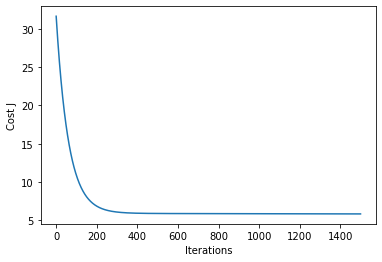

In [35]:
theta, Cost_J = GradientDiscent(X,Y)
print('theta: ', theta.ravel())
plt.plot(Cost_J)
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.show()

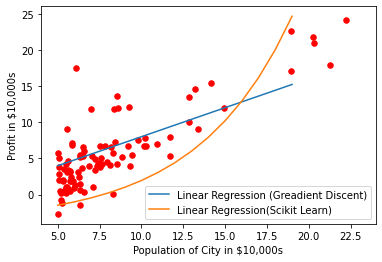

In [39]:
xx=np.arange(5,20)
yy=theta[0]+theta[1]*xx

#Plot gradient descent
plt.scatter(X[:, 1], Y, s=30, c='r', linewidth=1)
plt.plot(xx, yy, label='Linear Regression (Greadient Discent)')

#Compare with Scikit Learn Linear Regression

regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1,1), Y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_**xx, label = 'Linear Regression(Scikit Learn)')

plt.xlim(4,24)
plt.xlabel('Population of City in $10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc = 4)
plt.show()